<a href="https://colab.research.google.com/github/bintangkw/Data-Analytic-Ecommerce-Dataset/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Library

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##2. Preprocessing

In [4]:
df = pd.read_excel('/content/drive/MyDrive/ANALITIK DATA 2/Tubes/Pakistan Largest Ecommerce Dataset.xlsx')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,2016-01-07,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,2016-01-07,NaN,1950,2016,7,2016-7,2016-07-01,FY17,1
1,211133,canceled,2016-01-07,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,cod,2016-01-07,Gross,240,2016,7,2016-7,2016-07-01,FY17,2
2,211134,canceled,2016-01-07,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,cod,2016-01-07,Gross,2450,2016,7,2016-7,2016-07-01,FY17,3
3,211135,complete,2016-01-07,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,2016-01-07,Net,360,2016,7,2016-7,2016-07-01,FY17,4
4,211136,order_refunded,2016-01-07,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,cod,2016-01-07,Valid,1110,2016,7,2016-7,2016-07-01,FY17,5


##3. Data Understanding

In [5]:
df.describe()

,item_id,created_at,price,qty_ordered,grand_total,increment_id,discount_amount,Working Date,MV,Year,Month,M-Y,Customer ID
count,349.000000,349,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349,349.000000,349.0,349.0,349,349.000000
mean,211322.171920,2016-01-07 00:00:00,1971.284384,1.111748,2356.792980,1.001476e+08,7.163324,2016-01-07 00:00:00,2053.916905,2016.0,7.0,2016-07-01 00:00:00,47.355301
min,211131.000000,2016-01-07 00:00:00,1.000000,1.000000,0.000000,1.001474e+08,0.000000,2016-01-07 00:00:00,1.000000,2016.0,7.0,2016-07-01 00:00:00,1.000000
25%,211230.000000,2016-01-07 00:00:00,260.000000,1.000000,323.000000,1.001475e+08,0.000000,2016-01-07 00:00:00,288.000000,2016.0,7.0,2016-07-01 00:00:00,33.000000
50%,211322.000000,2016-01-07 00:00:00,360.000000,1.000000,366.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,360.000000,2016.0,7.0,2016-07-01 00:00:00,43.000000
75%,211415.000000,2016-01-07 00:00:00,555.000000,1.000000,1099.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,760.000000,2016.0,7.0,2016-07-01 00:00:00,59.000000
max,211510.000000,2016-01-07 00:00:00,96499.000000,6.000000,96499.000000,1.001477e+08,300.000000,2016-01-07 00:00:00,96499.000000,2016.0,7.0,2016-07-01 00:00:00,107.000000
std,108.891458,NaN,8863.822520,0.532404,9049.218907,7.909405e+01,36.127042,NaN,8935.456510,0.0,0.0,NaN,23.950376


In [6]:
df['status'].value_counts()

,count
status,
complete,230
canceled,50
order_refunded,49
received,13
refund,7


##4. Cleaning Data

In [7]:
df = df.drop(columns=['Working Date'])
df = df.drop(columns=['Customer ID'])
df = df.drop(columns=['created_at'])
df = df.drop(columns=['Customer Since'])
df = df.drop(columns=['M-Y'])
df = df.drop(columns=['item_id'])
df = df.drop(columns=['increment_id'])

In [8]:
df.isnull().sum()

,0
status,0
sku,0
price,0
qty_ordered,0
grand_total,0
category_name_1,0
sales_commission_code,0
discount_amount,0
payment_method,0
BI Status,1


In [9]:
df.dropna(inplace=True)

##5. Eksplorasi Data Analysis (EDA)

In [10]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY
1,0,129,240.0,1,240.0,1,58,0.0,1,0,240,2016,7,0
2,0,22,2450.0,1,2450.0,12,58,0.0,1,0,2450,2016,7,0
3,1,138,360.0,1,60.0,1,45,300.0,1,1,360,2016,7,0
4,2,12,555.0,2,1110.0,10,58,0.0,1,2,1110,2016,7,0
5,0,87,80.0,1,80.0,10,58,0.0,1,0,80,2016,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1,137,320.0,1,320.0,1,18,0.0,1,1,320,2016,7,0
345,2,50,512.0,1,512.0,7,58,0.0,1,2,512,2016,7,0
346,1,127,120.0,1,360.0,1,51,0.0,1,1,120,2016,7,0
347,1,132,120.0,1,360.0,1,51,0.0,1,1,120,2016,7,0


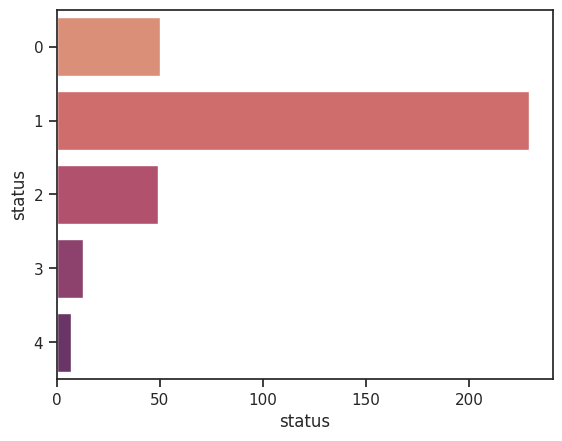

In [11]:
import warnings #menambahkan library warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks') #mengatur tema visualisasi
sns.countplot(y='status', data=df, palette='flare')
plt.xlabel('status')
plt.show()

In [12]:
import sklearn.model_selection as ms
x = df[['sku','price','qty_ordered','grand_total','category_name_1','sales_commission_code','discount_amount','payment_method','BI Status',' MV ','Year','Month','FY']]
y = df['status']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=30)

##7. Modeling (Decision tree)

In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
accuracy_gini = clf_gini.score(X_test, y_test)
print(f'Akurasi model gini: {accuracy_gini}')

accuracy_entropy = clf_entropy.score(X_test, y_test)
print(f'Akurasi model entropy: {accuracy_entropy}')

Akurasi model gini: 0.9809523809523809
Akurasi model entropy: 0.9809523809523809


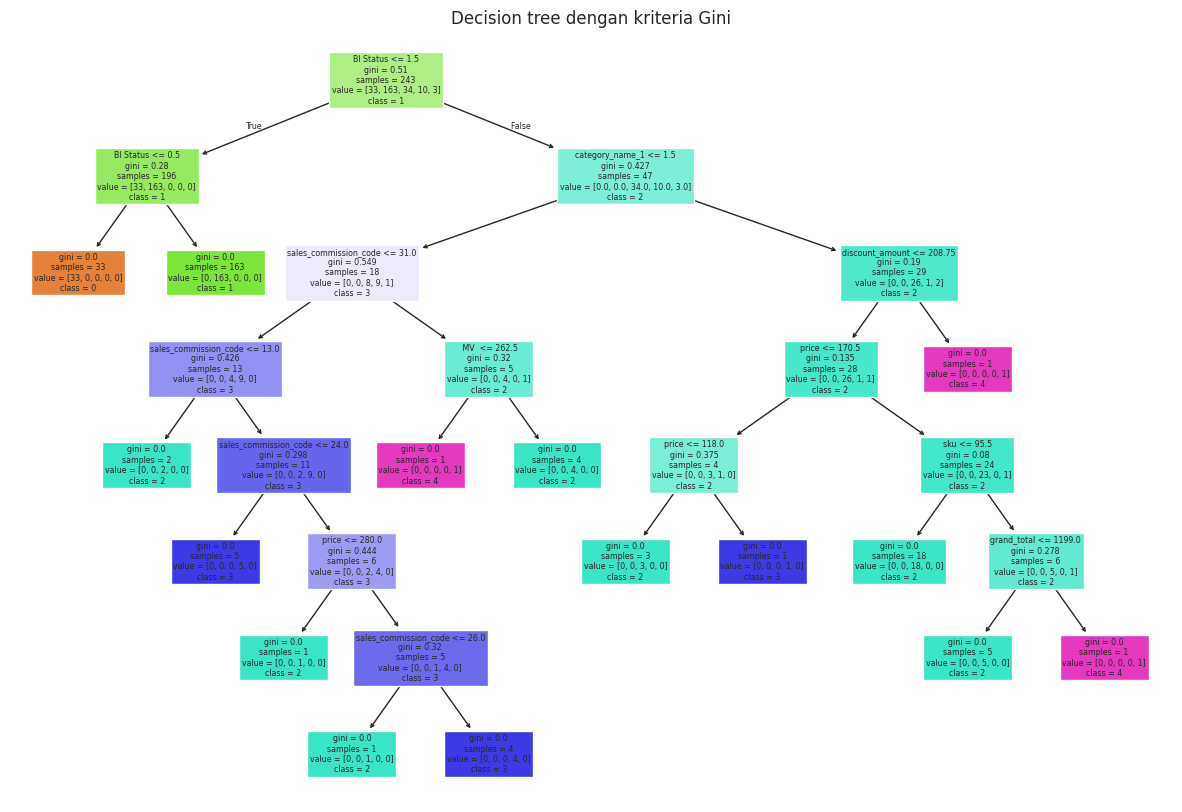

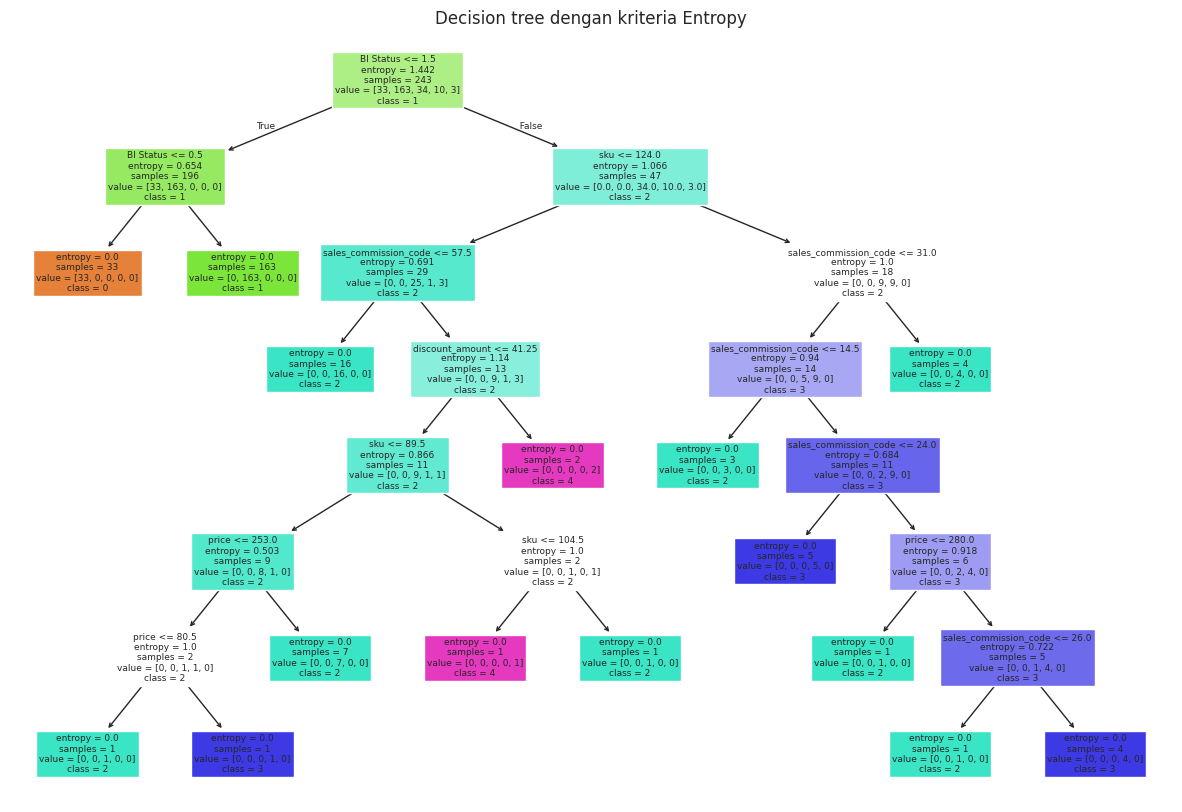

In [15]:
label_encoder.fit(y)
class_names = [str(c) for c in label_encoder.classes_]
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=x.columns, class_names=class_names)
plt.title('Decision tree dengan kriteria Gini')
plt.show()
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, feature_names=x.columns, class_names=class_names)
plt.title('Decision tree dengan kriteria Entropy')
plt.show()

In [16]:
testing1 = pd.DataFrame({
    'sku' : [131],
    'price': [500],
    'qty_ordered': [2],
    'grand_total': [370],
    'category_name_1': [7],
    'sales_commission_code': [0],
    'discount_amount': [58],
    'payment_method': [1],
    'BI Status' : [0],
    ' MV ' : [300],
    'Year': [2016],
    'Month': [7],
    'FY': [0]
})
testing1 = pd.DataFrame(testing1)
testing1

,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY
0,131,500,2,370,7,0,58,1,0,300,2016,7,0


In [17]:
y_pred_gini = clf_gini.predict(testing1)
y_pred_entropy = clf_entropy.predict(testing1)

print(f'Prediksi Model Gini: {y_pred_gini}')
print(f'Prediksi Model Entropy: {y_pred_entropy}')

preidctted_class_gini = label_encoder.inverse_transform(y_pred_gini)
preidctted_class_entropy = label_encoder.inverse_transform(y_pred_entropy)
print(f'Prediksi Kelas Gini : {preidctted_class_gini}')
print(f'Prediksi Kelas Entropy : {preidctted_class_entropy}')

Prediksi Model Gini: [0]
Prediksi Model Entropy: [0]
Prediksi Kelas Gini : [0]
Prediksi Kelas Entropy : [0]


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 1 1 1 1 1 1 2 0 0 0 1 2 1 2 2 1 1 0 0 2 1 1 1 1 1 1 2 4 1 2 1 1 0 1 1 1
 2 1 1 1 1 1 2 2 1 0 4 1 1 1 1 2 1 0 1 2 1 1 2 3 1 4 1 1 1 1 1 1 2 1 1 3 1
 1 0 1 2 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 2 0 1 1 1 4 1 0]


In [27]:
print("Decision Tree:")
print(classification_report(y_test, y_prediksi))
y_prob_dt = model.predict_proba(X_test)
print("AUC-ROC:", roc_auc_score(y_test, y_prob_dt, multi_class='ovr', average='weighted'))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        66
           2       0.81      0.87      0.84        15
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         4

    accuracy                           0.95       105
   macro avg       0.86      0.81      0.83       105
weighted avg       0.95      0.95      0.95       105

AUC-ROC: 0.9734323432343235
